# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np 

# Locations of train, valid and test set

training_file = "../traffic-sign-data/train.p"
validation_file= "../traffic-sign-data/valid.p"
testing_file =  "../traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of a traffic sign image
image_shape = X_train.shape[1:]

# Number of unique classes in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

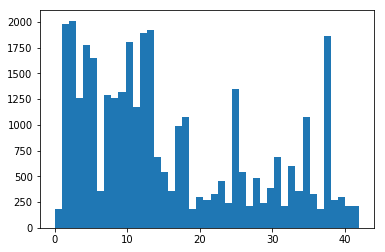

In [4]:
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
elements_in_each_class, bins, patches = plt.hist(y_train, n_classes, normed=0)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
#arrange indices of images in the order of there classes in a dictionary
#i.e separated_elements['0'] = [3 4 5 6], indices 3 ,4, 5, 6 of x_train belong to class 0 and so on 
separated_elements = dict()
for i in range(n_classes):
    #get the indices of images in x_train where images belong to class i
    separated_elements[str(i)] = np.array(np.where(y_train == i))

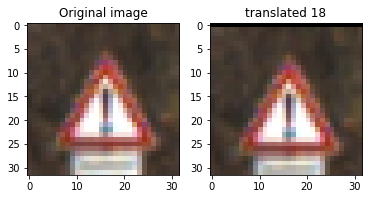

In [6]:
#translate the image
import random
import cv2
%matplotlib inline
def Translate_Image(input_x, random_X, random_Y):
    # Function to perform image translation by the amount specified in translation_matrix
    # Translation matrix is specified by M=[1 0 random_x; 0 1 random_Y]
    # translate_X and translate_Y are the number of pixels by which we are doing the translation
    # note that translation_matrix should be of np.float32() format
    height, width = input_x.shape[:2]
    translation_matrix = np.float32([[1,0,random_X],
                                    [0,1,random_Y]])
    return cv2.warpAffine(input_x,
                          M = translation_matrix,
                          dsize = (height, width))

random_index = random.randint(0,X_train.shape[0]-1)
image = X_train[random_index]
random_x = random.randint(-2, 2)
random_y = random.randint(-2, 2)
#when random_x and random_Y is zero , we have a duplicate copy of the same image !
if random_x == 0 and random_y == 0:
    random_x = 1
    random_y = 1
jittered_image = Translate_Image(image,
                                    random_X = random_x,
                                    random_Y = random_y)
temp_str = 'translated '+ str(y_train[random_index])

fig = plt.figure()
a=fig.add_subplot(1,2,1)
disp_image = image.squeeze()
plt.imshow(image.squeeze())
plt.title('Original image')


a=fig.add_subplot(1,2,2)
plt.imshow(jittered_image.squeeze())
plt.title(temp_str)

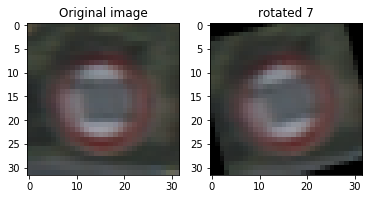

In [6]:
#rotating the image

def Rotate_Image(input_x, random_angle):
    # Function to perform image rotation by the amount specified in random_angle
    # Translation matrix is specified by M=[1 0 random_x; 0 1 random_Y]
    # translate_X and translate_Y are the number of pixels by which we are doing the translation
    # note that translation_matrix should be of np.float32() format
    height,width = input_x.shape[:2]
    center = [height/2,width/2]
    #rotation matrix
    translation_matrix = cv2.getRotationMatrix2D((center[0],center[1]),
                                                 angle = random_angle,
                                                 scale = 1)
    return cv2.warpAffine(input_x,
                          M = translation_matrix ,
                          dsize = (height, width))

random_index = random.randint(0,X_train.shape[0]-1)
image = X_train[random_index]
rand_angle = random.randint(-15,15)
jittered_image = Rotate_Image(image,
                              random_angle = rand_angle)
temp_str = 'rotated '+ str(y_train[random_index])

fig = plt.figure()
a=fig.add_subplot(1,2,1)
disp_image = image.squeeze()
plt.imshow(image.squeeze())
plt.title('Original image')


a=fig.add_subplot(1,2,2)
plt.imshow(jittered_image.squeeze())
plt.title(temp_str)

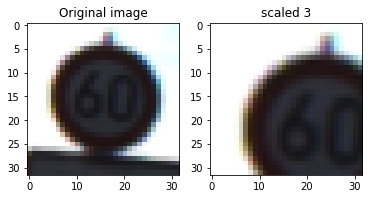

In [7]:
#image scaling
import math
def Scale_Image(input_x, random_scaling):
    #Function to perform image scaling by factor specified in random_scaling
    height, width = input_x.shape[:2]
    resized_image = cv2.resize(input_x,
                                dsize = (math.floor(random_scaling * width), math.floor(random_scaling * height)),
                                interpolation=cv2.INTER_CUBIC)

    if (resized_image.shape[0] < 32) or (resized_image.shape[1] < 32):
        return cv2.copyMakeBorder(resized_image,
                                  top = 32 - resized_image.shape[1],
                                  bottom = 32 - resized_image.shape[1],
                                  left = 32 - resized_image.shape[2],
                                  right = 32 - resized_image.shape[2],
                                  borderType = 'BORDER_CONSTANT')
    else:
        return resized_image[0:32,0:32]
    
random_index = random.randint(0,X_train.shape[0]-1)
image = X_train[random_index]
rand_scaling = random.uniform(1.1, 1.5)
jittered_image = Scale_Image(image,
                             random_scaling = rand_scaling)
temp_str = 'scaled ' + str(y_train[random_index])  

fig = plt.figure()
a=fig.add_subplot(1,2,1)
disp_image = image.squeeze()
plt.imshow(image.squeeze())
plt.title('Original image')


a=fig.add_subplot(1,2,2)
plt.imshow(jittered_image.squeeze())
plt.title(temp_str)

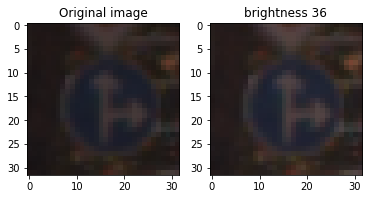

In [13]:
#Altering the nbrightness of the original image
def Brightness_Change(input_x, random_brightness_scale, grayscale_flag = False):
    #Function to perform brightness change in input image
    # output_brightness = input_brightness * random_brightness_scale
    #return (input_x * random_brightness_scale - 1.0)
    #convert image to HSV and sclae just the V channel to increase the brightness
    if not(grayscale_flag):
        hsv = cv2.cvtColor(input_x,
                           code = cv2.COLOR_RGB2HSV)
        #scale the v channel
        h, s, v = cv2.split(hsv)
        v = v*random_brightness_scale
        #check if overflow occurs
        v[np.where(v >255)] = 255
        v = np.array(v , dtype='f')
        v = v.astype(np.uint8) # make the data types of h,s and v same
        final_hsv = cv2.merge((h, s, v))
        return cv2.cvtColor(final_hsv,
                            code = cv2.COLOR_HSV2RGB)
    else:
        input_x = input_x * np.float32(random_brightness_scale)
        return input_x.astype(np.uint8)
grayscale_flag = 'False'
random_index = random.randint(0,X_train.shape[0]-1)
image = X_train[random_index]
rand_brightness_scale = random.uniform(0.8, 1.5)
jittered_image = Brightness_Change(image,
                                   random_brightness_scale = rand_brightness_scale,
                                   grayscale_flag = grayscale_flag)
temp_str = 'brightness ' + str(y_train[random_index])

fig = plt.figure()
a=fig.add_subplot(1,2,1)
disp_image = image.squeeze()
plt.imshow(image.squeeze())
plt.title('Original image')


a=fig.add_subplot(1,2,2)
plt.imshow(jittered_image.squeeze())
plt.title(temp_str)

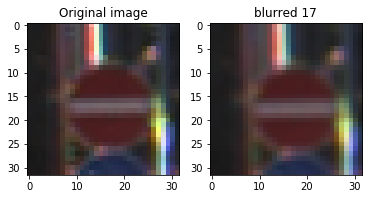

In [14]:
#Blurring the image
#Not used
def Gaussian_Blur(input_x, random_kernel_size):
    #Function to perform gaussian blur by the kernel size specified by Random_kernel_size
    return cv2.blur(input_x,
                    (random_kernel_size, random_kernel_size))

random_index = random.randint(0,X_train.shape[0]-1)
image = X_train[random_index]
rand_kernel_size = random.randint(2,4)
jittered_image = Gaussian_Blur(image,
                            random_kernel_size = rand_kernel_size)
temp_str = 'blurred ' + str(y_train[random_index])

fig = plt.figure()
a=fig.add_subplot(1,2,1)
disp_image = image.squeeze()
plt.imshow(image.squeeze())
plt.title('Original image')


a=fig.add_subplot(1,2,2)
plt.imshow(jittered_image.squeeze())
plt.title(temp_str)

In [15]:
#pipeline to augment the data, 
#randomly select an image belonging to a particular class and perform a jittering operation(i.e either translation
#rotation, scaling, brightness change , blurring) which is also selected at random

#minimum number of instances of each class after data augmentation
min_number = 1000
gray_scale = 'False'
for i in range(n_classes):
    if elements_in_each_class[i] < min_number:
        #get the diffrence between number of elements in the current class and max number, here max_number = 1000
        diff_in_Classes = min_number - elements_in_each_class[i]
        synthetically_generated_images = 0
        while synthetically_generated_images < diff_in_Classes:
            #create new artificial images to balance the data set
            #choose a random image belong to a class and perform 5 jittering with random values and append it to the same class
            random_index = random.randint(0,(separated_elements[str(i)].shape[1]) - 1 )
            #get the index of image in x_train, i.e access the element in random_image_index of separated_elements

            image_index = separated_elements[str(i)][0][random_index]
            image = X_train[image_index]         

            
            #random parameters for translate
            random_x = random.randint(-2, 2)
            random_y = random.randint(-2, 2)

            #random parameters for rotate
            rand_angle = random.randint(-15, 15)

            #random paramteres for scaling
            rand_scaling = random.uniform(1.1, 1.5)

            #random parameters for brightness adjustment
            rand_brightness_scale = random.uniform(0.8, 1.5)
            #apply jitter
            jittered_image = Brightness_Change(Scale_Image(Rotate_Image(Translate_Image(image,random_X = random_x,random_Y = random_y),random_angle = rand_angle),random_scaling = rand_scaling),random_brightness_scale = rand_brightness_scale )   


            synthetically_generated_images = synthetically_generated_images + 1            
            X_train = np.concatenate((X_train, [jittered_image]),
                                     axis=0)
            y_train = np.concatenate((y_train,[i]),
                                     axis = 0)           

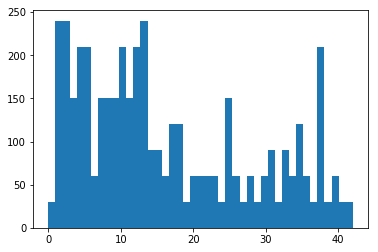

In [16]:
#histogram of validation set 
elements_in_each_class, bins, patches = plt.hist(y_valid, n_classes, normed=0)

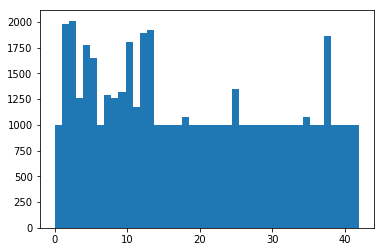

In [17]:
#histogram after Augmenting the data
elements_in_each_class, bins, patches = plt.hist(y_train, n_classes, normed=0)

In [7]:
#convert to grayscale , Histrogram normalize the images and center pixels to zero mean
x_grayscale = temp = np.sum(X_train/3, axis=3, keepdims=True)
x_valid_grayscale = np.sum(X_valid/3, axis=3, keepdims=True)

#images copy without histogram normalization
x_train_temp = (x_grayscale - 127.5)/255
x_valid_temp = (x_valid_grayscale - 127.5)/255

#histogram normalization
for i in range(0,X_train.shape[0]):
    x_grayscale[i,:,:,0] = cv2.equalizeHist(np.uint8(x_grayscale[i]))

for i in range(0,X_valid.shape[0]):
    x_valid_grayscale[i,:,:,0] = cv2.equalizeHist(np.uint8(x_valid_grayscale[i]))

#normalize histogram and zero mean
X_train = (x_grayscale - 127.5)/255
X_valid = (x_valid_grayscale - 127.5)/255

#display purposes
x_grayscale = X_train
x_valid_grayscale = X_valid


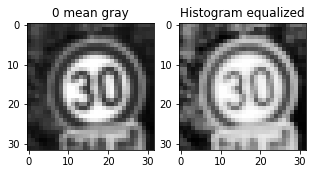

In [8]:
#display a random image
import random
index = random.randint(0,len(X_train))
image = x_train_temp[index].squeeze()
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('0 mean gray')

#display the histogram normalized image
plt.subplot(1,2,2)
image = X_train[index].squeeze()
plt.imshow(image,cmap='gray')
plt.title('Histogram equalized')


### Model Architecture

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
#probability of dropout
keep_prob = 0.5
mu = 0
sigma = 0.1

weights = {
    'wc1': tf.Variable(tf.random_normal([5,5,1,6],mu,sigma), name = 'wc1'),
    'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16],mu,sigma), name = 'wc2'),
    'wd1': tf.Variable(tf.random_normal([400, 120],mu,sigma),name = 'wd1'),
    'wd2': tf.Variable(tf.random_normal([120, 84],mu,sigma), name = 'wd2'),
    'out': tf.Variable(tf.random_normal([84, n_classes],mu,sigma),name = 'out')
         }

biases = {
    'bc1': tf.Variable(tf.zeros([6]),name = 'bc1'),
    'bc2': tf.Variable(tf.zeros([16]), name = 'bc2'),
    'bd1': tf.Variable(tf.zeros([120]), name= 'bd1'),
    'bd2': tf.Variable(tf.zeros([84]), name = 'bd2'),
    'out': tf.Variable(tf.zeros([n_classes]), name= 'out_bias')}

strides = {
        'Layer1_strides': {'conv':[1,1,1,1],
                          'maxpool':[1,2,2,1]},
        'Layer2_strides': {'conv':[1,1,1,1],
                          'maxpool':[1,2,2,1]}}

#Architecture definition
def LeNet(x):

    x = tf.nn.conv2d(x,weights['wc1'],strides['Layer1_strides']['conv'],'VALID')
    x = tf.nn.bias_add(x,biases['bc1'])
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x,strides['Layer1_strides']['maxpool'],strides['Layer1_strides']['maxpool'],'VALID')


    x = tf.nn.conv2d(x, weights['wc2'], strides['Layer2_strides']['conv'], 'VALID')
    x = tf.nn.bias_add(x,biases['bc2'])
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, strides['Layer2_strides']['maxpool'],strides['Layer2_strides']['maxpool'],'VALID')

    x = flatten(x)

    x = tf.add(tf.matmul(x,weights['wd1']),biases['bd1'])
    x = tf.nn.relu(x)

    x = tf.add(tf.matmul(x, weights['wd2']), biases['bd2'])
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)

    logits = tf.add(tf.matmul(x, weights['out']), biases['out'])
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
#epochs and batch size definition
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.0008

In [22]:
from sklearn.utils import shuffle
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.578

EPOCH 2 ...
Validation Accuracy = 0.723

EPOCH 3 ...
Validation Accuracy = 0.799

EPOCH 4 ...
Validation Accuracy = 0.822

EPOCH 5 ...
Validation Accuracy = 0.843

EPOCH 6 ...
Validation Accuracy = 0.857

EPOCH 7 ...
Validation Accuracy = 0.871

EPOCH 8 ...
Validation Accuracy = 0.880

EPOCH 9 ...
Validation Accuracy = 0.884

EPOCH 10 ...
Validation Accuracy = 0.892

EPOCH 11 ...
Validation Accuracy = 0.889

EPOCH 12 ...
Validation Accuracy = 0.897

EPOCH 13 ...
Validation Accuracy = 0.897

EPOCH 14 ...
Validation Accuracy = 0.894

EPOCH 15 ...
Validation Accuracy = 0.899

EPOCH 16 ...
Validation Accuracy = 0.903

EPOCH 17 ...
Validation Accuracy = 0.912

EPOCH 18 ...
Validation Accuracy = 0.902

EPOCH 19 ...
Validation Accuracy = 0.907

EPOCH 20 ...
Validation Accuracy = 0.917

EPOCH 21 ...
Validation Accuracy = 0.917

EPOCH 22 ...
Validation Accuracy = 0.920

EPOCH 23 ...
Validation Accuracy = 0.911

EPOCH 24 ...
Validation Accura

In [23]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten 
#probability of dropout
keep_prob = 0.5
#architecture 2 definition
def lenet_2(x):
    mu = 0
    sigma = 0.1
    n_classes = 43
    weights = {
        'wc1': tf.Variable(tf.random_normal([5,5,1,6],mu,sigma)),
        'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16],mu,sigma)),
        'wd1': tf.Variable(tf.random_normal([694, 100],mu,sigma)),
        'wd2': tf.Variable(tf.random_normal([100, 84],mu,sigma)),
        'out': tf.Variable(tf.random_normal([84, n_classes],mu,sigma))
             }

    biases = {
        'bc1': tf.Variable(tf.zeros([6])),
        'bc2': tf.Variable(tf.zeros([16])),
        'bd1': tf.Variable(tf.zeros([100])),
        'bd2': tf.Variable(tf.zeros([84])),
        'out': tf.Variable(tf.zeros([n_classes]))}

    strides = {
            'Layer1_strides': {'conv':[1,1,1,1],
                              'maxpool':[1,2,2,1]},
            'Layer2_strides': {'conv':[1,1,1,1],
                              'maxpool':[1,2,2,1]}}



    x = tf.nn.conv2d(x,weights['wc1'],strides['Layer1_strides']['conv'],'VALID')
    x = tf.nn.bias_add(x,biases['bc1'])
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x,strides['Layer1_strides']['maxpool'],strides['Layer1_strides']['maxpool'],'VALID')
    #second subsampling layer
    temp = tf.nn.max_pool(x,strides['Layer1_strides']['maxpool'],strides['Layer1_strides']['maxpool'],'VALID')
    temp = flatten(temp)

    x = tf.nn.conv2d(x, weights['wc2'], strides['Layer2_strides']['conv'], 'VALID')
    x = tf.nn.bias_add(x,biases['bc2'])
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, strides['Layer2_strides']['maxpool'],strides['Layer2_strides']['maxpool'],'VALID')

    x = tf.concat_v2([temp, flatten(x)], 1)

    x = tf.add(tf.matmul(x,weights['wd1']),biases['bd1'])
    x = tf.nn.relu(x)

    #x = tf.nn.dropout(x, keep_prob)
    
    x = tf.add(tf.matmul(x, weights['wd2']), biases['bd2'])
    x = tf.nn.relu(x)

    x = tf.nn.dropout(x, keep_prob)
    
    logits = tf.add(tf.matmul(x, weights['out']), biases['out'])
    return logits

In [24]:
#train model
from sklearn.utils import shuffle
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

save_file = './train_model2'



logits = lenet_2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.540

EPOCH 2 ...
Validation Accuracy = 0.696

EPOCH 3 ...
Validation Accuracy = 0.747

EPOCH 4 ...
Validation Accuracy = 0.777

EPOCH 5 ...
Validation Accuracy = 0.815

EPOCH 6 ...
Validation Accuracy = 0.820

EPOCH 7 ...
Validation Accuracy = 0.832

EPOCH 8 ...
Validation Accuracy = 0.856

EPOCH 9 ...
Validation Accuracy = 0.855

EPOCH 10 ...
Validation Accuracy = 0.858

EPOCH 11 ...
Validation Accuracy = 0.864

EPOCH 12 ...
Validation Accuracy = 0.883

EPOCH 13 ...
Validation Accuracy = 0.881

EPOCH 14 ...
Validation Accuracy = 0.887

EPOCH 15 ...
Validation Accuracy = 0.887

EPOCH 16 ...
Validation Accuracy = 0.887

EPOCH 17 ...
Validation Accuracy = 0.890

EPOCH 18 ...
Validation Accuracy = 0.890

EPOCH 19 ...
Validation Accuracy = 0.889

EPOCH 20 ...
Validation Accuracy = 0.897

EPOCH 21 ...
Validation Accuracy = 0.894

EPOCH 22 ...
Validation Accuracy = 0.909

EPOCH 23 ...
Validation Accuracy = 0.896

EPOCH 24 ...
Validation Accura

In [16]:
#architecture 3 definition
def lenet_3(x):
    mu = 0
    sigma = 0.1
    n_classes = 43
    weights = {
        'wc1': tf.Variable(tf.random_normal([5,5,1,6],mu,sigma)),
        'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16],mu,sigma)),
        'wc3': tf.Variable(tf.random_normal([5, 5, 16, 128], mu, sigma)),
        'wd1': tf.Variable(tf.random_normal([1704, 100],mu,sigma)),
        'wd2': tf.Variable(tf.random_normal([100, 84],mu,sigma)),
        'out': tf.Variable(tf.random_normal([84, n_classes],mu,sigma))
             }

    biases = {
        'bc1': tf.Variable(tf.zeros([6])),
        'bc2': tf.Variable(tf.zeros([16])),
        'bc3': tf.Variable(tf.zeros([128])),
        'bd1': tf.Variable(tf.zeros([100])),
        'bd2': tf.Variable(tf.zeros([84])),
        'out': tf.Variable(tf.zeros([n_classes]))}

    strides = {
            'Layer1_strides': {'conv':[1,1,1,1],
                              'maxpool':[1,2,2,1]},
            'Layer2_strides': {'conv':[1,1,1,1],
                              'maxpool':[1,2,2,1]},
            'Layer3_strides': {'conv': [1, 1, 1, 1]}
                }



    x = tf.nn.conv2d(x,weights['wc1'],strides['Layer1_strides']['conv'],'VALID')
    x = tf.nn.bias_add(x,biases['bc1'])
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x,strides['Layer1_strides']['maxpool'],strides['Layer1_strides']['maxpool'],'VALID')
    #second subsampling layer
    #temp = tf.nn.max_pool(x,strides['Layer1_strides']['maxpool'],strides['Layer1_strides']['maxpool'],'VALID')
    temp = flatten(x)

    x = tf.nn.conv2d(x, weights['wc2'], strides['Layer3_strides']['conv'], 'VALID')
    x = tf.nn.bias_add(x,biases['bc2'])
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, strides['Layer2_strides']['maxpool'],strides['Layer2_strides']['maxpool'],'VALID')

    layer_1_2_flattened = tf.concat([temp, flatten(x)], 1)
    x = tf.nn.conv2d(x, weights['wc3'], strides['Layer2_strides']['conv'], 'VALID')
    x = tf.nn.bias_add(x, biases['bc3'])
    x = tf.nn.relu(x)

    x = tf.concat([layer_1_2_flattened, flatten(x)],1)


    x = tf.add(tf.matmul(x,weights['wd1']),biases['bd1'])
    x = tf.nn.relu(x)


    
    x = tf.add(tf.matmul(x, weights['wd2']), biases['bd2'])
    x = tf.nn.relu(x)

    x = tf.nn.dropout(x, keep_prob)
    
    logits = tf.add(tf.matmul(x, weights['out']), biases['out'])
    return logits


In [17]:
#train model
from sklearn.utils import shuffle
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

save_file = './train_model3'

logits = lenet_3(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.639

EPOCH 2 ...
Validation Accuracy = 0.768

EPOCH 3 ...
Validation Accuracy = 0.828

EPOCH 4 ...
Validation Accuracy = 0.852

EPOCH 5 ...
Validation Accuracy = 0.867

EPOCH 6 ...
Validation Accuracy = 0.878

EPOCH 7 ...
Validation Accuracy = 0.892

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.910

Model saved


In [18]:
#normalize the test set
x_test_temp = X_test
x_test_grayscale = temp = np.sum(X_test/3, axis=3, keepdims=True)
for i in range(0,x_test_grayscale.shape[0]):
    x_test_grayscale[i,:,:,0] = cv2.equalizeHist(np.uint8(x_test_grayscale[i]))
X_test = (x_test_grayscale - 127.5)/255

In [19]:
#test the model on the test set 
save_file = './train_model3'
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./train_model3.meta')
    saver.restore(sess, save_file)    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.886


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
#import the traffic sign images
filelist = glob.glob('../traffic_sign_images/*.jpg')
new_width  = 32
new_height = 32
my_images = np.array([np.array(Image.open(fname).resize((new_width, new_height), Image.ANTIALIAS)) for fname in filelist])

print('Input Image shape:',my_images.shape)

Input Image shape: (5, 32, 32, 3)


### Predict the Sign Type for Each Image

In [22]:
#Preprocesing the images ..image(RGB) ---> Grayscale---> Histogram normalize--->Zero mean
images_normalised = np.sum(my_images/3, axis=3, keepdims=True)
for i in range(0,images_normalised.shape[0]):
    images_normalised[i,:,:,0] = cv2.equalizeHist(np.uint8(images_normalised[i]))
images_normalised = (images_normalised - 127.5)/255
labels = [12,11,14,2,3]
images_normalised.shape

(5, 32, 32, 1)

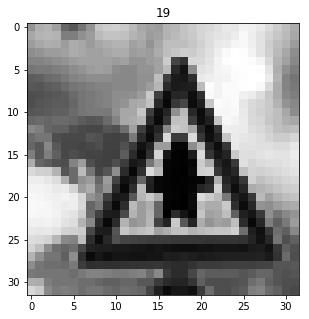

In [23]:
#display a random test image
import random
index = random.randint(0,4)
image = images_normalised[index].squeeze()
images_normalised[index].shape
plt.figure(figsize=(5,5))
plt.imshow(image,cmap='gray')
plt.title(str(y_train[index]))

### Analyze Performance

In [25]:
with tf.Session() as sess:   
    saver.restore(sess, './train_model3')
    for i in range(images_normalised.shape[0]):        
        predictions = sess.run(logits,feed_dict={x:images_normalised})       
        soft_max_pred = sess.run(tf.nn.softmax(predictions, dim=-1, name=None))
        top_5 = sess.run(tf.nn.top_k(soft_max_pred, k=5))
#print('Test soft MAx: {}'.format(soft_max_pred))

Test soft MAx: [[  5.04197725e-12   2.05208703e-08   6.10447328e-15   2.14150182e-12
    9.74100264e-17   3.71451635e-16   2.83763135e-11   2.66752224e-12
    7.96075379e-17   2.97414599e-19   1.73840214e-14   9.98868465e-01
    1.40878925e-07   7.22199455e-16   5.46227910e-21   7.89806347e-21
    2.48895179e-16   1.59126037e-18   5.49765718e-05   6.69179545e-10
    2.38561142e-07   1.77693366e-07   4.39405692e-21   2.20643577e-12
    2.51073925e-05   2.97590988e-12   2.93461646e-08   8.03285220e-04
    5.48011805e-08   1.30330630e-16   2.47529446e-04   2.37418761e-15
    7.45183221e-11   3.75074936e-11   3.41323811e-16   3.62255581e-13
    8.26428363e-15   1.00757481e-15   2.67409863e-16   7.70593600e-19
    2.71074487e-08   1.16778453e-11   4.12201340e-09]
 [  3.38577534e-11   1.32156536e-01   8.67840588e-01   4.16692728e-07
    2.39025733e-17   5.41181393e-08   9.90765088e-08   1.37722972e-10
    4.74534474e-12   4.43713866e-09   3.19917520e-18   1.02374741e-10
    1.24395096e-13   

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(soft_max_pred)):
    plt.subplot(5,2,(2*i)+1)
    plt.imshow(images_normalised[i].squeeze(),
               cmap= 'gray')
    plt.subplot(5,2,(2*i)+2)
    plt.bar(top_5[1][i],top_5[0][i])
    


In [36]:
#print softmax probabilities
print('SOft max probablities: {}'.format(top_5[0]))
print('SOft max predicted classes: {}'.format(top_5[1]))

SOft max probablities: [[  9.98868465e-01   8.03285220e-04   2.47529446e-04   5.49765718e-05
    2.51073925e-05]
 [  8.67840588e-01   1.32156536e-01   2.20550305e-06   4.16692728e-07
    9.90765088e-08]
 [  9.99987006e-01   1.16740121e-05   9.97704433e-07   2.56256129e-07
    2.70453482e-09]
 [  3.89696449e-01   2.05808729e-01   1.64819062e-01   1.06899351e-01
    7.48084784e-02]
 [  9.22654152e-01   6.24781474e-02   3.42103769e-03   3.27154971e-03
    2.35562469e-03]]
SOft max predicted classes: [[11 27 30 18 24]
 [ 2  1 13  3  6]
 [12 40  9 33 10]
 [37 41  9 35 13]
 [12 40  9 19 35]]


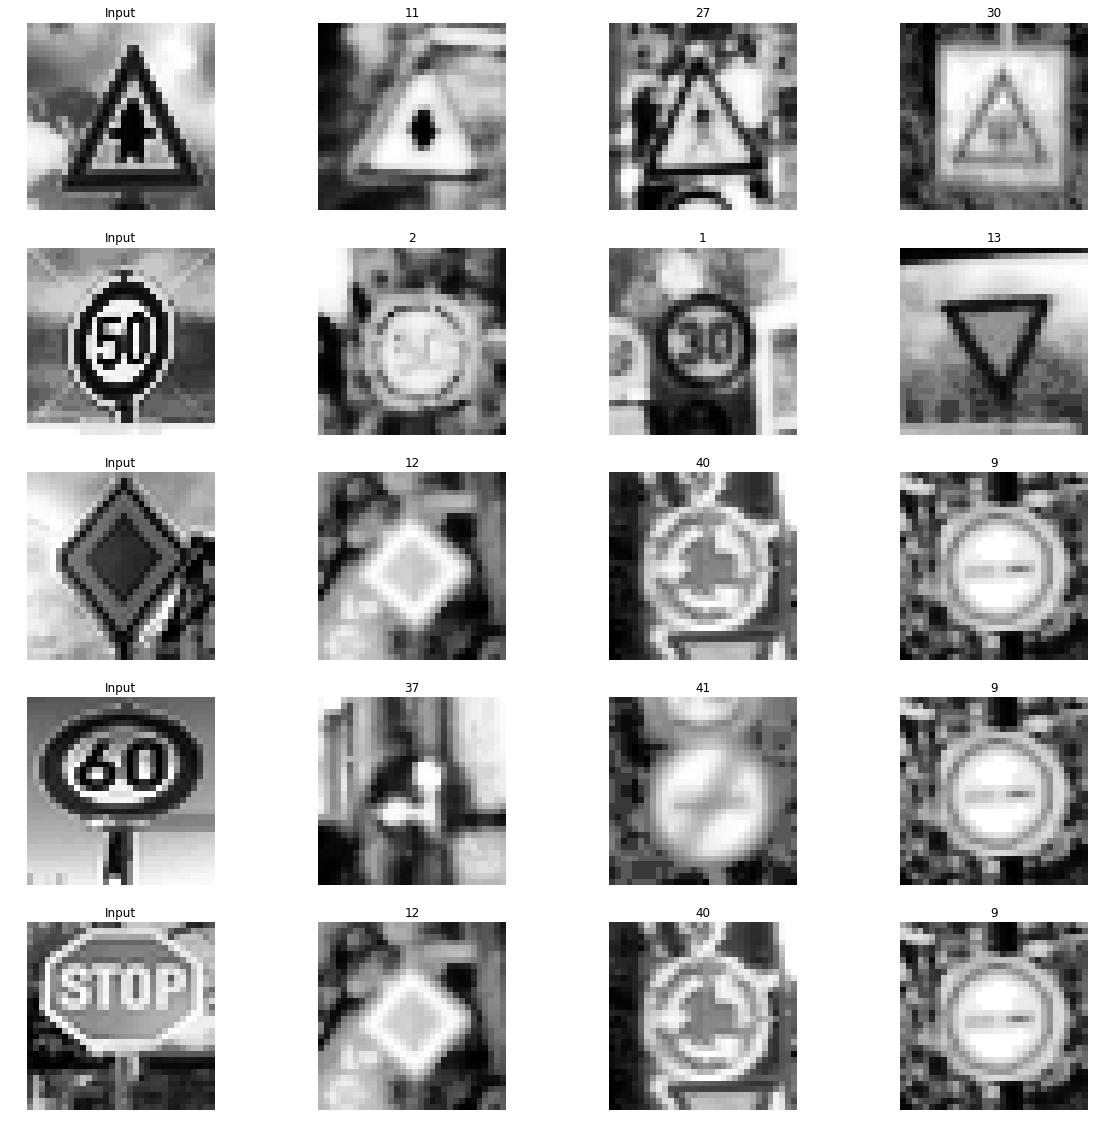

In [34]:
#print predictions depending on softmax predictions
images_probablities = top_5[1]
plt.figure(figsize=(20,20))
k = 1
#looping through all the input images and the predctions priority wise
for i in range(0,5):
    plt.subplot(5,4,k)
    plt.imshow(images_normalised[i].squeeze(),
               cmap= 'gray')
    plt.axis('off')
    plt.title('Input')
    k = k + 1
    for j in range(0,3):
        #temp = images_probablities[i][j]
        plt.subplot(5, 4, k)
        plt.imshow(x_grayscale[separated_elements[str(images_probablities[i][j])][0][0]].squeeze(),cmap = 'gray')
        plt.title(str(images_probablities[i][j]))
        plt.axis('off')
        k = k + 1

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 